# Power Atlas Extrapolate
This script fills in the 'Uncertain' nodes in the Power atlas by grabbing the closest node's label.

In [1]:
import pandas as pd
import numpy as np

%load_ext autoreload
%autoreload 2

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_theme(
    context="paper", 
    style="whitegrid", 
    font_scale=1.2,
    rc={'figure.figsize': (20, 20), 'figure.dpi': 300}
)

## Load in Power Atlas

In [2]:
from nilearn import plotting, datasets
from common.paths import POWER

power = datasets.fetch_coords_power_2011()
coords = np.vstack((power.rois['x'], power.rois['y'], power.rois['z'])).T

power_labels = pd.read_csv(POWER, index_col='ROI')
node_colors = power_labels['Color'].values.tolist()
display(power_labels)

,X,Y,Z,Assignment,Color,System
ROI,,,,,,
1,-24.66,-97.84,-12.33,-1,White,Uncertain
2,26.68,-97.30,-13.49,-1,White,Uncertain
3,23.96,31.94,-17.78,-1,White,Uncertain
4,-56.16,-44.76,-24.23,-1,White,Uncertain
5,8.13,41.12,-24.31,-1,White,Uncertain
...,...,...,...,...,...,...
260,-26.60,-70.72,36.86,12,Green,Dorsal attention
261,-32.23,-1.08,54.06,12,Green,Dorsal attention
262,-42.26,-60.12,-8.85,12,Green,Dorsal attention


## Get certain/labeled nodes

In [3]:
certain_nodes = power_labels[power_labels['System'] != 'Uncertain']
certain_nodes_np = certain_nodes.to_numpy()
print(f'Num certain nodes: {len(certain_nodes)}')

Num certain nodes: 236


## Get uncertain nodes

In [4]:
uncertain_nodes = power_labels[power_labels['System'] == 'Uncertain']
uncertain_nodes = uncertain_nodes.drop(columns=['Assignment', 'Color', 'System'])
uncertain_nodes_np = uncertain_nodes.to_numpy()
uncertain_nodes_index_np = uncertain_nodes.index.to_numpy()
# display(uncertain_nodes)
print(f'Num uncertain nodes: {len(uncertain_nodes)}')

Num uncertain nodes: 28


## Extrapolate label for uncertain nodes using closest certain node

In [36]:
# For each uncertain node, find the closest certain node (shortest distance) and output that 
# certain node's label
for roi, uc_node_coor in zip(uncertain_nodes_index_np, uncertain_nodes_np):
    shortest_dist = 9999
    label = ''
    
    for c_node in certain_nodes_np:
        c_node_coor = c_node[:3]
        dist = np.linalg.norm(uc_node_coor - c_node_coor)
        
        if dist < shortest_dist:
            shortest_dist = dist
            label = c_node[-1]
        
    print(roi, '->', label)
    print(f'ROI {roi} -> {label}')

1 -> Visual
2 -> Visual
3 -> Fronto-parietal Task Control
4 -> Default mode
5 -> Default mode
6 -> Default mode
7 -> Default mode
8 -> Default mode
9 -> Default mode
10 -> Default mode
11 -> Default mode
12 -> Fronto-parietal Task Control
84 -> Default mode
85 -> Salience
132 -> Salience
140 -> Visual
141 -> Visual
142 -> Visual
182 -> Default mode
183 -> Cerebellar
184 -> Default mode
185 -> Default mode
247 -> Default mode
248 -> Default mode
249 -> Default mode
250 -> Default mode
253 -> Cerebellar
254 -> Fronto-parietal Task Control


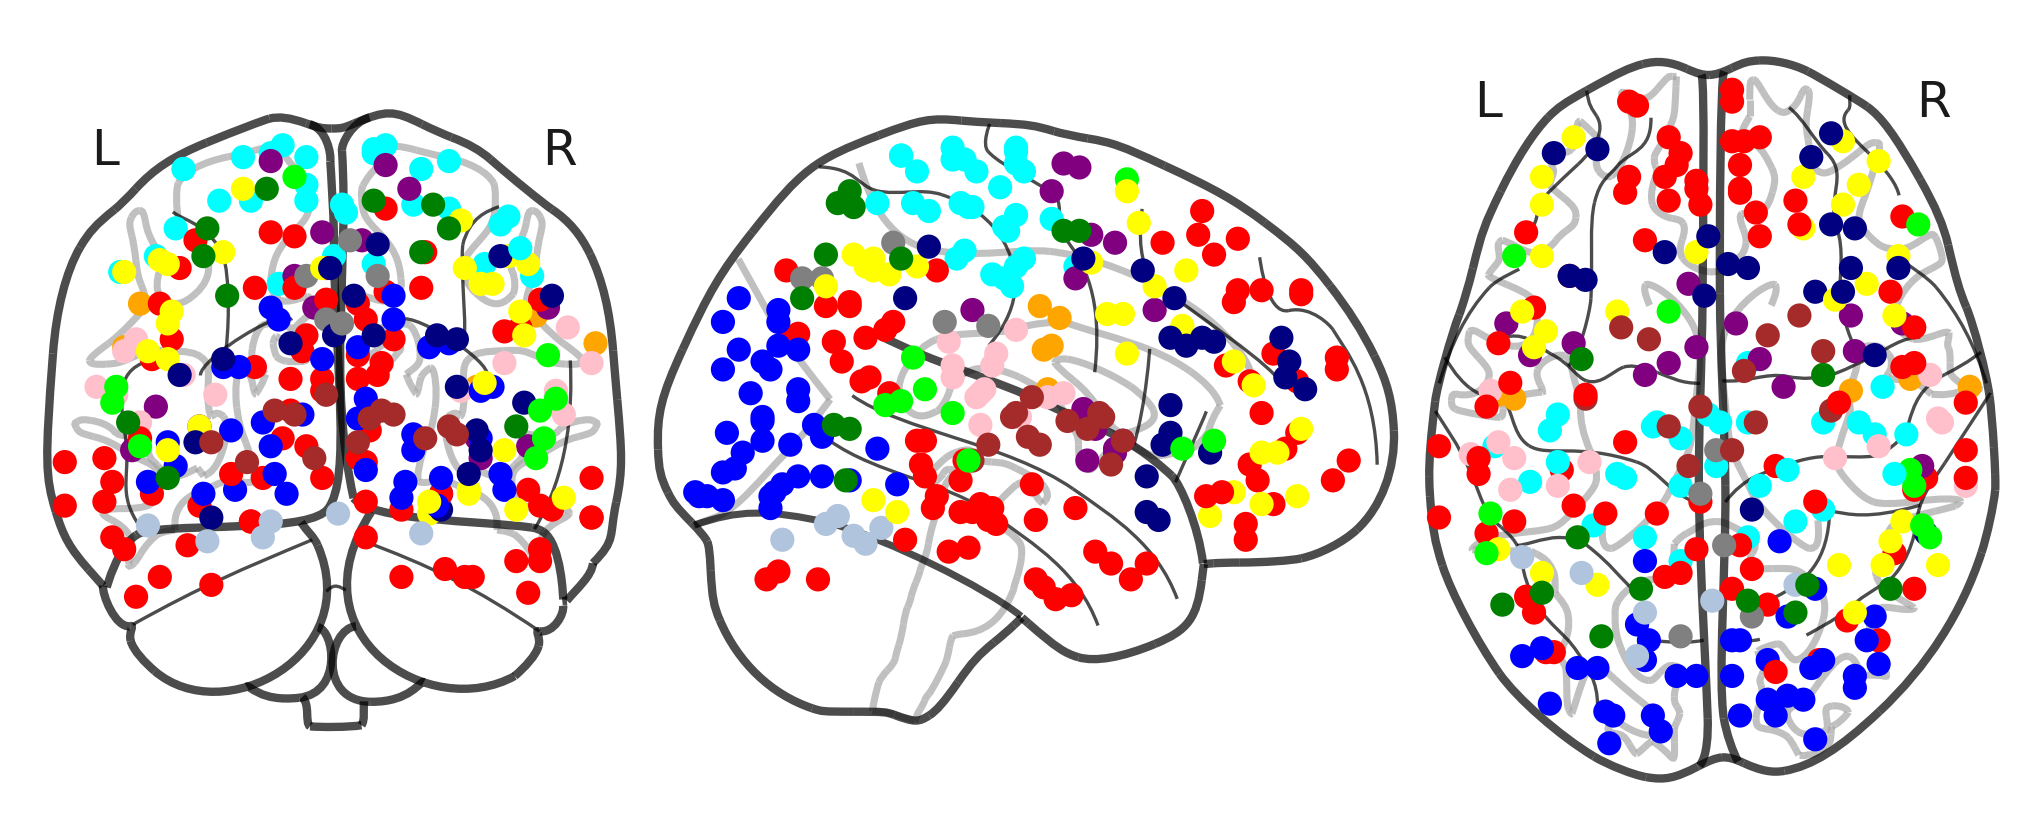

In [16]:
fc = np.zeros((264, 264))
plotting.plot_connectome(fc, coords, node_size=25, node_color=node_colors)